In [ ]:

#http://sebastianraschka.com/Articles/2014_kernel_density_est.html#Summarizing-the-implementation-of-the-Parzen-window%20estimation-with-a-hypercube-kernel
#https://github.com/rasbt/pattern_classification/blob/master/stat_pattern_class/proj/proj_2014.ipynb

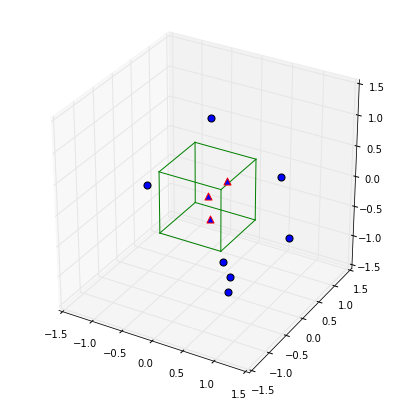

In [103]:
%matplotlib inline

from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# Plot Points

# samples within the cube
X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                  [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                  [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

In [108]:
def window_function(x_vec, unit_len=1):
    """
    Implementation of the window function. Returns 1 if 3x1-sample vector
    lies within a origin-centered hypercube, 0 otherwise.
    """
    for row in x_vec:
        if np.abs(row) > ((unit_len)/2):
            return 0
    return 1

In [109]:
X_all = np.vstack((X_inside,X_outside))
assert(X_all.shape == (10,3))

k_n = 0
for row in X_all:
    k_n += window_function(row.reshape(3,1))

print('Points inside the hypercube:', k_n)
print('Points outside the hybercube:', len(X_all) - k_n)

('Points inside the hypercube:', 3)
('Points outside the hybercube:', 7)


In [112]:
def parzen_window_est(x_samples, h=1, center=[0,0,0]):
    '''
    Implementation of the Parzen-window estimation for hypercubes.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row.
        h: The length of the hypercube.
        center: The coordinate center of the hypercube

    Returns the probability density for observing k samples inside the hypercube.

    '''
    dimensions = x_samples.shape[1]

    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)

print('p(x) =', parzen_window_est(X_all, h=1))

('p(x) =', 0.3)


In [113]:
import numpy as np

# Generate 10,000 random 2D-patterns
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, 10000)

print(x_2Dgauss.shape)

(10000, 2)


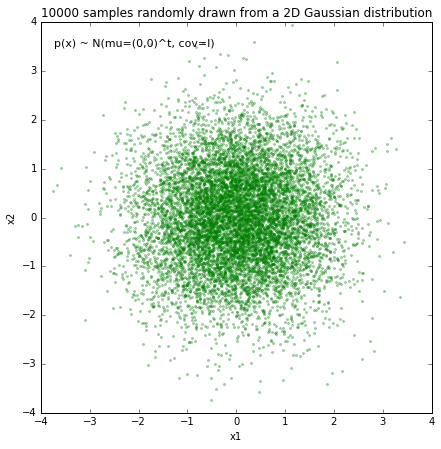

In [47]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_2Dgauss[:,0], x_2Dgauss[:,1],
        marker='o', color='green', s=4, alpha=0.3)
plt.title('10000 samples randomly drawn from a 2D Gaussian distribution')
plt.ylabel('x2')
plt.xlabel('x1')
ftext = 'p(x) ~ N(mu=(0,0)^t, cov=I)'
plt.figtext(.15,.85, ftext, fontsize=11, ha='left')
plt.ylim([-4,4])
plt.xlim([-4,4])

plt.show()

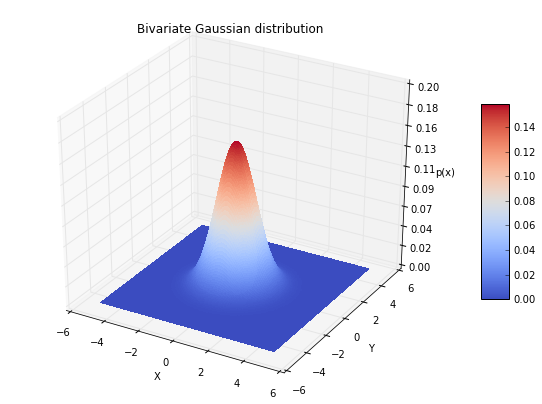

In [114]:
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1,
        cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False
    )

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gaussian distribution')
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

In [115]:
def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]),\
        'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]),\
        'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]),\
        'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]),\
        'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]),\
        'mu and x must have the same dimensions'

    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [116]:
from matplotlib.mlab import bivariate_normal

x = np.array([[0],[0]])
mu = np.array([[0],[0]])
cov = np.eye(2)

mlab_gauss = bivariate_normal(x,x)
mlab_gauss = float(mlab_gauss[0]) # because mlab returns an np.array
impl_gauss = pdf_multivariate_gauss(x, mu, cov)

print('mlab_gauss:', mlab_gauss)
print('impl_gauss:', impl_gauss)
assert(mlab_gauss == impl_gauss),\
        'Implementations of the mult. Gaussian return different pdfs'

('mlab_gauss:', 0.15915494309189535)
('impl_gauss:', 0.15915494309189535)


In [118]:
print('Predict p(x) at the center [0,0]: ')

print('h = 0.1 ---> p(x) =', parzen_window_est(
        x_2Dgauss, h=0.1, center=[0, 0])
        )
print('h = 0.3 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=0.3, center=[0, 0])
        )
print('h = 0.6 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=0.6, center=[0, 0])
        )
print('h = 1 ---> p(x) =',parzen_window_est(
        x_2Dgauss, h=1, center=[0, 0])
        )

Predict p(x) at the center [0,0]: 
('h = 0.1 ---> p(x) =', 0.14999999999999997)
('h = 0.3 ---> p(x) =', 0.14666666666666667)
('h = 0.6 ---> p(x) =', 0.15694444444444444)
('h = 1 ---> p(x) =', 0.1483)


In [119]:
import operator

# generate a range of 400 window widths between 0 < h < 1
h_range = np.linspace(0.001, 1, 400)

# calculate the actual density at the center [0, 0]
mu = np.array([[0],[0]])
cov = np.eye(2)
actual_pdf_val = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)

# get a list of the differnces (|estimate-actual|) for different window widths
parzen_estimates = [np.abs(parzen_window_est(x_2Dgauss, h=i, center=[0, 0])
               - actual_pdf_val) for i in h_range]

# get the window width for which |estimate-actual| is closest to 0
min_index, min_value = min(enumerate(parzen_estimates), key=operator.itemgetter(1))

print('Optimal window width for this data set: ', h_range[min_index])

('Optimal window width for this data set: ', 0.43915789473684214)


In [122]:
import prettytable

p1 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0, 0])
p2 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0.5, 0.5])
p3 = parzen_window_est(x_2Dgauss, h=h_range[min_index], center=[0.3, 0.2])

mu = np.array([[0],[0]])
cov = np.eye(2)

a1 = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)
a2 = pdf_multivariate_gauss(np.array([[0.5],[0.5]]), mu, cov)
a3 = pdf_multivariate_gauss(np.array([[0.3],[0.2]]), mu, cov)

results = prettytable.PrettyTable(["", "predicted", "actual"])
results.add_row(["p([0,0]^t",p1, a1])
results.add_row(["p([0.5,0.5]^t",p2, a2])
results.add_row(["p([0.3,0.2]^t",p3, a3])

print(results)

+---------------+----------------+----------------+
|               |   predicted    |     actual     |
+---------------+----------------+----------------+
|   p([0,0]^t   | 0.159183110432 | 0.159154943092 |
| p([0.5,0.5]^t | 0.121331751925 | 0.12394999431  |
| p([0.3,0.2]^t | 0.136887104736 | 0.149138918807 |
+---------------+----------------+----------------+


In [ ]:
#########################################for classification purpose#########################################

In [123]:
import numpy as np

# Covariance matrices
cov_mats = {}
for i in range(1,4):
    cov_mats[i] = i * np.eye(2)

# mean vectors    
mu_vecs = {}
for i,j in zip(range(1,4), [[0,0], [3,0], [4,5]]):
    mu_vecs[i] = np.array(j).reshape(2,1)

In [124]:
# Generating the random samples
all_samples = {}
for i in range(1,4):
    # generating 40x2 dimensional arrays with random Gaussian-distributed samples
    class_samples = np.random.multivariate_normal(mu_vecs[i].ravel(), cov_mats[i], 40)
    # adding class label to 3rd column
    class_samples = np.append(class_samples, np.zeros((40,1))+i, axis=1)
    all_samples[i] = class_samples

In [125]:
# Dividing the samples into training and test datasets
train_set = np.append(all_samples[1][0:20], all_samples[2][0:20], axis=0)
train_set = np.append(train_set, all_samples[3][0:20], axis=0)

test_set = np.append(all_samples[1][20:40], all_samples[2][20:40], axis=0)
test_set = np.append(test_set, all_samples[3][20:40], axis=0)

assert(train_set.shape == (60, 3))
assert(test_set.shape == (60, 3))

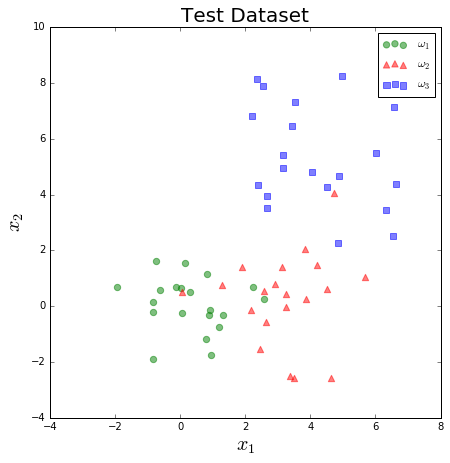

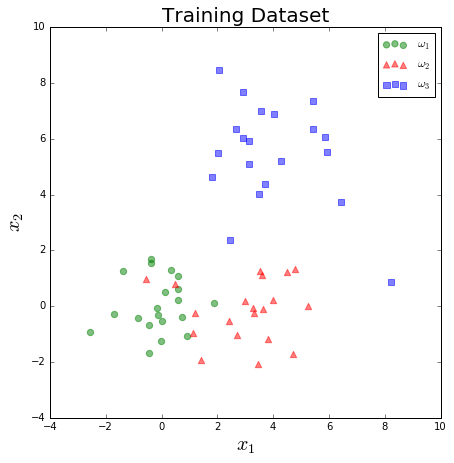

In [126]:
# Visualizing samples by plotting them in a scatter plot

import numpy as np
from matplotlib import pyplot as plt

for dset,title in zip((test_set, train_set), ['Test', 'Training']):
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(dset[dset[:,2] == 1][:,0], dset[dset[:,2] == 1][:,1], \
           marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,2] == 2][:,0], dset[dset[:,2] == 2][:,1], \
           marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,2] == 3][:,0], dset[dset[:,2] == 3][:,1], \
           marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right')
    plt.title('{} Dataset'.format(title), size=20)
    plt.ylabel('$x_2$', size=20)
    plt.xlabel('$x_1$', size=20)
plt.show()

In [127]:
import operator

def bayes_classifier(x_vec, kdes):
    """
    Classifies an input sample into class w_j determined by
    maximizing the class conditional probability for p(x|w_j).

    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        kdes: List of the gausssian_kde (kernel density) estimates

    Returns a tuple ( p(x|w_j)_value, class label ).

    """
    p_vals = []
    for kde in kdes:
        p_vals.append(kde.evaluate(x_vec))
    max_index, max_value = max(enumerate(p_vals), key=operator.itemgetter(1))
    return (max_value, max_index + 1)

In [128]:
from scipy.stats import kde
class1_kde = kde.gaussian_kde(train_set[train_set[:,2] == 1].T[0:2],
        bw_method='scott')
class2_kde = kde.gaussian_kde(train_set[train_set[:,2] == 2].T[0:2],
        bw_method='scott')
class3_kde = kde.gaussian_kde(train_set[train_set[:,2] == 3].T[0:2],
        bw_method='scott')

In [132]:
train_set[train_set[:,2] == 1]

array([[ 1.88205153,  0.12457955,  1.        ],
       [ 0.57573592,  1.07685374,  1.        ],
       [ 0.32205667,  1.28750072,  1.        ],
       [-2.55038385, -0.93261965,  1.        ],
       [ 0.73191509, -0.37512818,  1.        ],
       [ 0.91808489, -1.05604118,  1.        ],
       [-0.4626299 , -1.69366323,  1.        ],
       [ 0.58009139,  0.23507088,  1.        ],
       [-1.68982636, -0.29351271,  1.        ],
       [-0.02037536, -1.23240725,  1.        ],
       [ 0.00284833, -0.53306475,  1.        ],
       [-0.39067044,  1.54153744,  1.        ],
       [-0.10975003, -0.30292842,  1.        ],
       [ 0.10626188,  0.49363682,  1.        ],
       [-0.17965596, -0.07468945,  1.        ],
       [-1.36944883,  1.25318209,  1.        ],
       [-0.39526189,  1.70843011,  1.        ],
       [ 0.59189246,  0.62649094,  1.        ],
       [-0.82950036, -0.43458674,  1.        ],
       [-0.44037235, -0.67039718,  1.        ]])

In [133]:
train_set[train_set[:,2] == 1].T[0:2]

array([[ 1.88205153,  0.57573592,  0.32205667, -2.55038385,  0.73191509,
         0.91808489, -0.4626299 ,  0.58009139, -1.68982636, -0.02037536,
         0.00284833, -0.39067044, -0.10975003,  0.10626188, -0.17965596,
        -1.36944883, -0.39526189,  0.59189246, -0.82950036, -0.44037235],
       [ 0.12457955,  1.07685374,  1.28750072, -0.93261965, -0.37512818,
        -1.05604118, -1.69366323,  0.23507088, -0.29351271, -1.23240725,
        -0.53306475,  1.54153744, -0.30292842,  0.49363682, -0.07468945,
         1.25318209,  1.70843011,  0.62649094, -0.43458674, -0.67039718]])

In [140]:
def empirical_error(data_set, classes, classifier_func, classifier_func_args):
    """
    Keyword arguments:
        data_set: 'n x d'- dimensional numpy array, 
            class label in the last column.
        classes: List of the class labels.
        classifier_func: Function that returns the 
            max argument from the discriminant function.
            evaluation and the class label as a tuple.
        classifier_func_args: List of arguments for the 'classifier_func'.
    
    Returns a tuple, consisting of a dictionary 
        with the classif. counts and the error.
    
    e.g., ( {1: {1: 321, 2: 5}, 2: {1: 0, 2: 317}}, 0.05)
    where keys are class labels, and values are 
    sub-dicts counting for which class (key)
    how many samples where classified as such.
    
    """
    class_dict = {i:{j:0 for j in classes} for i in classes}

    for cl in classes:
        for row in data_set[data_set[:,-1] == cl][:,:-1]:
            g = classifier_func(row, *classifier_func_args)
            class_dict[cl][g[1]] += 1
    
    correct = 0
    for i in classes:
        correct += class_dict[i][i]
    
    misclass = data_set.shape[0] - correct
    return (class_dict, misclass / data_set.shape[0])

In [139]:
import prettytable

classification_dict, error = empirical_error(test_set, [1,2,3], bayes_classifier,
        [[class1_kde, class2_kde, class3_kde]])

labels_predicted = ['w{} (predicted)'.format(i) for i in [1,2,3]]
labels_predicted.insert(0,'test dataset')

train_conf_mat = prettytable.PrettyTable(labels_predicted)
for i in [1,2,3]:
    a, b, c = [classification_dict[i][j] for j in [1,2,3]]
    # workaround to unpack (since Python does not support just '*a')
    train_conf_mat.add_row(['w{} (actual)'.format(i), a, b, c])
print(train_conf_mat)
print('Empirical Error: {:.2f} ({:.2f}%)'.format(error, error * 100))

+--------------+----------------+----------------+----------------+
| test dataset | w1 (predicted) | w2 (predicted) | w3 (predicted) |
+--------------+----------------+----------------+----------------+
| w1 (actual)  |       17       |       3        |       0        |
| w2 (actual)  |       2        |       17       |       1        |
| w3 (actual)  |       0        |       1        |       19       |
+--------------+----------------+----------------+----------------+
Empirical Error: 0.12 (11.67%)


In [161]:
classification_dict, error = empirical_error(train_set, [1,2,3], bayes_classifier,
        [[class3_kde]])
print error
print classification_dict

0.666666666667
{1: {1: 20, 2: 0, 3: 0}, 2: {1: 20, 2: 0, 3: 0}, 3: {1: 20, 2: 0, 3: 0}}


In [160]:
classification_dict, error = empirical_error(test_set, [1,2,3], bayes_classifier,
        [[class1_kde, class2_kde, class3_kde]])
print error
print classification_dict

0.116666666667
{1: {1: 17, 2: 3, 3: 0}, 2: {1: 2, 2: 17, 3: 1}, 3: {1: 0, 2: 1, 3: 19}}
